<a href="https://colab.research.google.com/github/MuhammadAwon/backyard-projects/blob/main/intro-to-deep-learning/neural_network_regression/01b_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📖 Extra curriculum

If you're looking for extra materials relating to this notebook, I'd check out the following:

* [MIT introduction deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.

To practice your regression modelling with TensorFlow, I'd also encourage you to look through [Lion Bridge's collection of datasets](https://lionbridge.ai/datasets/) or [Kaggle's datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* `AveragePrice` - the average price of a single avocado
* `type` - conventional or organic
* `year` - the year
* `Region` - the city or region of the observation
* `Total Volume` - Total number of avocados sold
* `4046` - Total number of avocados with PLU 4046 sold (**non-organic small/medium Hass Avocados ~3-5 oz**)
* `4225` - Total number of avocados with PLU 4225 sold (**non-organic large Hass Avocados ~8-10 oz**)
* `4770` - Total number of avocados with PLU 4770 sold (**non-organic extra large Hass Avocados ~10-15 oz**)


In [ ]:
# Import dataset
avocado = pd.read_csv('Avocado.csv')
avocado.head()

,region,type,year,4046,4225,4770,Total Volume,Small Bags,Large Bags,XLarge Bags,Total Bags,AveragePrice
0,Albany,conventional,2015,1036.74,54454.85,48.16,64236.62,8603.62,93.25,0.0,8696.87,1.33
1,Albany,conventional,2015,674.28,44638.81,58.33,54876.98,9408.07,97.49,0.0,9505.56,1.35
2,Albany,conventional,2015,794.70,109149.67,130.50,118220.22,8042.21,103.14,0.0,8145.35,0.93
3,Albany,conventional,2015,1132.00,71976.41,72.58,78992.15,5677.40,133.76,0.0,5811.16,1.08
4,Albany,conventional,2015,941.48,43838.39,75.78,51039.60,5986.26,197.69,0.0,6183.95,1.28


In [ ]:
avocado.shape

(18249, 12)

In [ ]:
# Find null values
avocado.isnull().any()

region          False
type            False
year            False
4046            False
4225            False
4770            False
Total Volume    False
Small Bags      False
Large Bags      False
XLarge Bags     False
Total Bags      False
AveragePrice    False
dtype: bool

In [ ]:
# Columns information
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        18249 non-null  object 
 1   type          18249 non-null  object 
 2   year          18249 non-null  int64  
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Volume  18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  Total Bags    18249 non-null  float64
 11  AveragePrice  18249 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Data statistical summary
avocado.describe().T

,count,mean,std,min,25%,50%,75%,max
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25


In [ ]:
X = avocado.drop('AveragePrice', axis=1)
y = avocado['AveragePrice']

In [ ]:
X.head()

,region,type,year,4046,4225,4770,Total Volume,Small Bags,Large Bags,XLarge Bags,Total Bags
0,Albany,conventional,2015,1036.74,54454.85,48.16,64236.62,8603.62,93.25,0.0,8696.87
1,Albany,conventional,2015,674.28,44638.81,58.33,54876.98,9408.07,97.49,0.0,9505.56
2,Albany,conventional,2015,794.70,109149.67,130.50,118220.22,8042.21,103.14,0.0,8145.35
3,Albany,conventional,2015,1132.00,71976.41,72.58,78992.15,5677.40,133.76,0.0,5811.16
4,Albany,conventional,2015,941.48,43838.39,75.78,51039.60,5986.26,197.69,0.0,6183.95


In [ ]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2,
                                                                            random_state=42)

In [ ]:
train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((14599, 11), (3650, 11), (14599,), (3650,))

In [ ]:
X.columns

Index(['region', 'type', 'year', '4046', '4225', '4770', 'Total Volume',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'Total Bags'],
      dtype='object')

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ['year', '4046', '4225', '4770', 'Total Volume',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'Total Bags']),
       (OneHotEncoder(), ['region', 'type'])
)

ct.fit(train_features)

train_features_norm = ct.transform(train_features)
test_features_norm = ct.transform(test_features)

In [ ]:
train_features_norm = train_features_norm.toarray()

In [ ]:
test_features_norm = test_features_norm.toarray()

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

history = model.fit(train_features_norm, train_labels, epochs=200)

Epoch 1/200
457/457 [==============================] - 1s 1ms/step - loss: 0.2354 - mae: 0.2354
Epoch 2/200
457/457 [==============================] - 1s 2ms/step - loss: 0.2062 - mae: 0.2062
Epoch 3/200
457/457 [==============================] - 1s 2ms/step - loss: 0.2047 - mae: 0.2047
Epoch 4/200
457/457 [==============================] - 1s 1ms/step - loss: 0.2045 - mae: 0.2045
Epoch 5/200
457/457 [==============================] - 1s 1ms/step - loss: 0.2037 - mae: 0.2037
Epoch 6/200
457/457 [==============================] - 1s 1ms/step - loss: 0.2037 - mae: 0.2037
Epoch 7/200
457/457 [==============================] - 1s 1ms/step - loss: 0.2034 - mae: 0.2034
Epoch 8/200
457/457 [==============================] - 1s 1ms/step - loss: 0.2032 - mae: 0.2032
Epoch 9/200
457/457 [==============================] - 1s 1ms/step - loss: 0.2023 - mae: 0.2023
Epoch 10/200
457/457 [==============================] - 1s 1ms/step - loss: 0.2025 - mae: 0.2025
Epoch 11/200
457/457 [=================

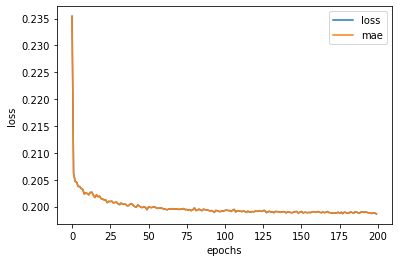

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss');

In [ ]:
_, mae = model.evaluate(test_features_norm, test_labels)

115/115 [==============================] - 0s 1ms/step - loss: 0.2015 - mae: 0.2015
